## RANSAC самописный

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def generate_random_x_y(k = 5, b = 20):
    x = np.arange(-100,100,1) 
    y = x*k+b + np.random.randint(-80,80, 200)   

    x = np.append(x,np.random.randint(-100,100,60)) 
    y = np.append(y,np.random.randint(-400,400,60))
    return x,y


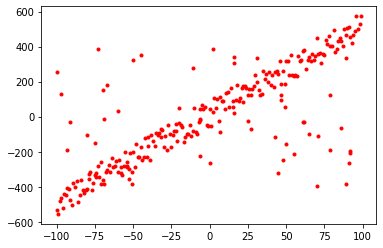

In [75]:
x,y = generate_random_x_y()
plt.plot(x,y,'.r')

### уравнение прямой A*X+B*Y + C = 0
### A = y1-y2, B = (x2-x1), C = (x1*y2 - x2*y1)

### Расстояние  = |A*x1 + B*y1 +C| / (sqrt(A^2 + B^2) )

In [188]:
Y = 1
X = 0

def fit(x:np.ndarray, y:np.ndarray, cnt_iteration = 20000):
        
        if(x.shape[0] != y.shape[0]):
                print(" проверь раазмерность ...")
                return 0
        distance   = np.zeros(cnt_iteration)
        arr_point1 = np.zeros((cnt_iteration,2))
        arr_point2 = np.zeros((cnt_iteration,2))

        for i in range(cnt_iteration):

                num_point1 = np.random.randint(0, x.shape[0])
                num_point2 = np.random.randint(0, x.shape[0])
                
                point1     = [ x[num_point1], y[num_point1]]
                point2     = [ x[num_point2], y[num_point2]]
                
                arr_point1[i] = point1
                arr_point1[i] = point2
                

                A = point1[Y] - point2[Y]
                B = point2[X] - point1[X]
                C = point1[X]*point2[Y] - point2[X]*point1[Y] 

                distance[i] = np.sum(np.absolute( A*x + B*y + C ) / (np.sqrt(A**2 + B**2 )  ) )

        return arr_point1[distance.argmin()], arr_point2[distance.argmin()]
        

In [189]:
def draw(point1, point2):
    x_ = np.random.randint(-100,100,100)
    y_ = point1[Y] + (((x_ - point1[X]) * (point2[Y] - point1[Y])) / (point2[X] - point1[X]) )
    
    plt.plot(x_,y_)
    plt.plot(x,y, '.r')


/tmp/ipykernel_14130/3933908500.py:29: RuntimeWarning: invalid value encountered in true_divide
  distance[i] = np.sum(np.absolute( A*x + B*y + C ) / (np.sqrt(A**2 + B**2 )  ) )


[ -65. -313.] [0. 0.]


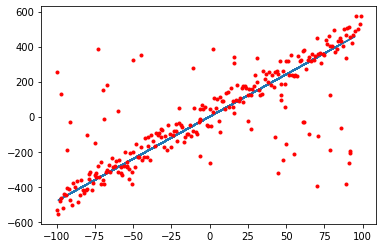

In [190]:
point1, point2 = fit(x,y)
print(point1, point2)
draw(point1, point2)